In [1]:
from chromo.models import Sophia20, Pythia8, UrQMD34, DpmjetIII191
from chromo.kinematics import CenterOfMass, GeV
import boost_histogram as bh

kin = CenterOfMass(1000 * GeV, "p", "p")

nevents = 10000

h = bh.Histogram(bh.axis.Regular(20, -10, 10), bh.axis.IntCategory([], growth=True), bh.axis.Integer(0, 2))
for iModel, Model in enumerate((UrQMD34, DpmjetIII191)):
    m = Model(kin, seed=1)
    for event in m(nevents):
        fs = event.final_state()
        h.fill(fs.eta, fs.pid, iModel)


/home/anatoli/devel_wsl/chromo/src/chromo/models/urqmd.py:203: RuntimeWarning: 13 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/home/anatoli/devel_wsl/chromo/src/chromo/models/urqmd.py:203: RuntimeWarning: 130 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/home/anatoli/devel_wsl/chromo/src/chromo/models/urqmd.py:203: RuntimeWarning: 310 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/home/anatoli/devel_wsl/chromo/src/chromo/models/urqmd.py:203: RuntimeWarning: -13 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)


 (info) dsigma: calculating constants for ang. dist.
 (info) dsigma: calculation finished
 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.5                       |
 |                                                                       |
 |                      (Last change:  16 Jan 2023)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch (ASIoP)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        

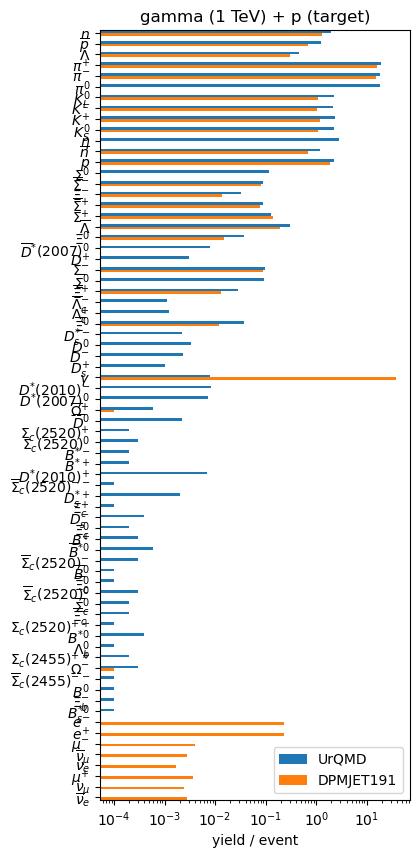

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from particle import Particle

y = -np.arange(len(h.axes[1]))
plt.figure(figsize=(4, 10))
plt.barh(y + 0.125, h[sum, :, 0].values() / nevents, label="UrQMD", height=0.25)
plt.barh(y - 0.125, h[sum, :, 1].values() / nevents, label="DPMJET191", height=0.25)
plt.yticks(y, (f"${Particle.from_pdgid(x).latex_name}$" for x in h.axes[1]))
plt.semilogx()
plt.legend()
plt.xlabel("yield / event")
plt.ylim(y[-1] - 0.25, y[0] + 0.25)
plt.title("gamma (1 TeV) + p (target)");